In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sncosmo

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["axes.linewidth"] = 1.2
matplotlib.rcParams["xtick.major.size"] = 8.0
matplotlib.rcParams["ytick.major.size"] = 8.0
matplotlib.rcParams["xtick.minor.size"] = 3.0
matplotlib.rcParams["ytick.minor.size"] = 3.0
matplotlib.rcParams["xtick.minor.visible"] = True
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.minor.visible"] = True
matplotlib.rcParams["ytick.direction"] = "in"
matplotlib.rcParams["xtick.top"] = True
matplotlib.rcParams["ytick.right"] = True

Reading in composite spectra which were made following the procedure in Siebert et al 2019. These were done seperately and are being included here after the compositing process.

In [34]:
f_kpora_hv = pd.read_csv('data/foundation_only_vhigh_N=8_Nspec=9_phase=m0.44_x1=0.54.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)
f_kpora_lv = pd.read_csv('data/foundation_only_vlow_N=20_Nspec=20_phase=p0.67_x1=-0.04.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)

k_kpora_hv = pd.read_csv('data/kaepora_only_vhigh_N=15_Nspec=25_phase=m0.26_x1=1.13.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)
k_kpora_lv = pd.read_csv('data/kaepora_only_vlow_N=38_Nspec=98_phase=p0.11_x1=1.14.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)

b_kpora_hv = pd.read_csv('data/foundation+kaepora_vhigh_N=23_Nspec=34_phase=m0.35_x1=nan.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)
b_kpora_lv = pd.read_csv('data/foundation+kaepora_vlow_N=61_Nspec=122_phase=p0.15_x1=1.13.txt',
                     skiprows=10,names=['wavelength','flux','flux_l','flux_u','phase','x1','z','vel','num_sn'],
                     delim_whitespace=True)

In [45]:
def printRange(data, label):
    percs_x1 = np.percentile(data.x1, [50,16,84])
    percs_phase = np.percentile(data.phase, [50,16,84])
    print(label)
    print('x1: {:.3f}<--{:.3f}-->{:.3f}'.format(percs_x1[1],percs_x1[0],percs_x1[2]))
    print('phase: {:.3f}<--{:.3f}-->{:.3f}'.format(percs_phase[1],percs_phase[0],percs_phase[2]))
printRange(f_kpora_hv, r'Foundation HV')
print('='*10)
printRange(f_kpora_lv, r'Foundation LV')
print('='*10)
printRange(k_kpora_hv, r'Kaepora HV')
print('='*10)
printRange(k_kpora_lv, r'Kaepora LV')

Foundation HV
x1: 0.383<--0.980-->2.919
phase: -0.660<---0.276-->0.578
Foundation LV
x1: -0.320<---0.007-->0.203
phase: -0.036<--0.691-->1.324
Kaepora HV
x1: 1.111<--1.129-->1.139
phase: -0.435<---0.230-->-0.096
Kaepora LV
x1: 1.111<--1.129-->1.159
phase: -0.034<--0.049-->0.176


In [3]:
def sncosmoBandMag(wave, flux, band, magsys='ab'):
    w_source = np.asarray(wave)
    f_source = np.asarray([flux, flux, flux, flux, flux])
    p_source = np.linspace(0,1,5)
    source = sncosmo.TimeSeriesSource(p_source, w_source, f_source, name='')
    model_spec = sncosmo.Model(source)
    return model_spec.bandmag(band, magsys, 0)

In [31]:
def plotKaepora(data_h, data_l):
    print("HV: {}".format(np.max(data_h.num_sn)))
    print("NV: {}".format(np.max(data_l.num_sn)))
    
    b_hv = sncosmoBandMag(data_h.wavelength, data_h.flux, 'standard::b')
    b_lv = sncosmoBandMag(data_l.wavelength, data_l.flux, 'standard::b')

    v_hv = sncosmoBandMag(data_h.wavelength, data_h.flux, 'standard::v')
    v_lv = sncosmoBandMag(data_l.wavelength, data_l.flux, 'standard::v')
    print('B-V HV: {:.3f}'.format(b_hv-v_hv))
    print('B-V LV: {:.3f}'.format(b_lv-v_lv))
    
    
    f, (ax1, ax2) = plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]},
                                 sharex=True, figsize=(12,8))
    plt.subplots_adjust(hspace=0.0)
    
    ax1.plot(data_h.wavelength,data_h.flux,color='r')
    ax1.fill_between(data_h.wavelength,y1=data_h.flux-data_h.flux_l,
                     y2=data_h.flux+data_h.flux_u,
                     color='r',alpha=0.3)
    ax1.plot(data_l.wavelength,data_l.flux,'b')
    ax1.fill_between(data_l.wavelength,y1=data_l.flux-data_l.flux_l,
                     y2=data_l.flux+data_l.flux_u,
                     color='b',alpha=0.3)
    
    ax2.plot(data_h.wavelength,data_h.num_sn,'r')
    ax2.plot(data_l.wavelength,data_l.num_sn,'b')
    
    ax2.set_xlabel(r'Rest Wavelength [$\mathrm{\AA}$]',fontsize=36)
    ax2.set_ylabel('# of Spectra', fontsize=16)
    ax1.set_ylabel(r'Flux',fontsize=36)
    ax2.tick_params(axis='x',labelsize=20)
    ax1.set_xlim([3500,7000])
    ax1.set_ylim(bottom=0.01)
    
def stackKaepora(data_h1, data_l1, data_h2, data_l2, data_label1, data_label2):
    f, (ax11, ax21, ax12, ax22) = plt.subplots(4,1,gridspec_kw={'height_ratios':[3,1,3,1]},
                                               sharex=True, figsize=(12,16))
    plt.subplots_adjust(hspace=0.0)
    
    ax11.plot(data_h1.wavelength,data_h1.flux,color='r')
    ax11.fill_between(data_h1.wavelength,y1=data_h1.flux-data_h1.flux_l,
                     y2=data_h1.flux+data_h1.flux_u,
                     color='r',alpha=0.3)
    ax11.plot(data_l1.wavelength,data_l1.flux,'b')
    ax11.fill_between(data_l1.wavelength,y1=data_l1.flux-data_l1.flux_l,
                     y2=data_l1.flux+data_l1.flux_u,
                     color='b',alpha=0.3)
    
    ax21.plot(data_h1.wavelength,data_h1.num_sn,'r')
    ax21.plot(data_l1.wavelength,data_l1.num_sn,'b')
    # Second plot
    ax12.plot(data_h2.wavelength,data_h2.flux,color='r')
    ax12.fill_between(data_h2.wavelength,y1=data_h2.flux-data_h2.flux_l,
                     y2=data_h2.flux+data_h2.flux_u,
                     color='r',alpha=0.3)
    ax12.plot(data_l2.wavelength,data_l2.flux,'b')
    ax12.fill_between(data_l2.wavelength,y1=data_l2.flux-data_l2.flux_l,
                     y2=data_l2.flux+data_l2.flux_u,
                     color='b',alpha=0.3)
    
    ax22.plot(data_h2.wavelength,data_h2.num_sn,'r')
    ax22.plot(data_l2.wavelength,data_l2.num_sn,'b')
    
    ax11.text(5600,2.25,data_label1,fontsize=30)
    b_hv1 = sncosmoBandMag(data_h1.wavelength, data_h1.flux, 'standard::b')
    b_lv1 = sncosmoBandMag(data_l1.wavelength, data_l1.flux, 'standard::b')
    v_hv1 = sncosmoBandMag(data_h1.wavelength, data_h1.flux, 'standard::v')
    v_lv1 = sncosmoBandMag(data_l1.wavelength, data_l1.flux, 'standard::v')
    ax11.text(5600,2.,r'$(B-V)_{{HV-NV}} = {:+.3f}\,\,{{\rm mag}}$'.format((b_hv1-v_hv1)-(b_lv1-v_lv1)),fontsize=20)
    
    ax12.text(5600,2.25,data_label2,fontsize=30)
    b_hv2 = sncosmoBandMag(data_h2.wavelength, data_h2.flux, 'standard::b')
    b_lv2 = sncosmoBandMag(data_l2.wavelength, data_l2.flux, 'standard::b')
    v_hv2 = sncosmoBandMag(data_h2.wavelength, data_h2.flux, 'standard::v')
    v_lv2 = sncosmoBandMag(data_l2.wavelength, data_l2.flux, 'standard::v')
    ax12.text(5600,2.,r'$(B-V)_{{HV-NV}} = {:+.3f}\,\,{{\rm mag}}$'.format((b_hv2-v_hv2)-(b_lv2-v_lv2)),fontsize=20)
    
    ax22.set_xlabel(r'Rest Wavelength [$\mathrm{\AA}$]',fontsize=36)
    ax21.set_ylabel('# of Spectra', fontsize=16)
    ax21.tick_params(axis='y',labelsize=16)
    ax22.set_ylabel('# of Spectra', fontsize=16)
    ax22.tick_params(axis='y',labelsize=16)
    ax11.set_ylabel(r'Normalized Flux',fontsize=36)
    ax12.set_ylabel(r'Normalized Flux',fontsize=36)
    ax22.tick_params(axis='x',labelsize=20)
    ax12.set_xlim([3500,7000])
    ax11.set_ylim(bottom=0.01)
    ax12.set_ylim(bottom=0.01,top=2.99)
    ax21.set_ylim(bottom=0.01)
    ax22.set_ylim(bottom=0.01)

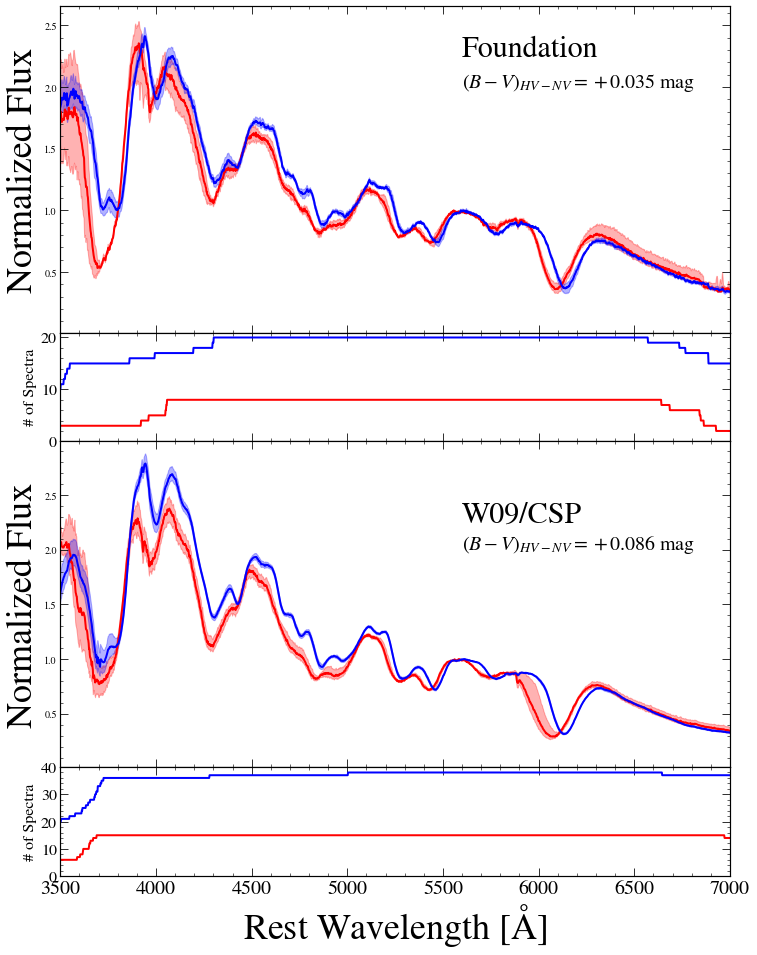

In [32]:
stackKaepora(f_kpora_hv,f_kpora_lv,k_kpora_hv,k_kpora_lv,'Foundation','W09/CSP')
plt.savefig('compositeSpec_figures/found_w09_stack_composite.pdf',bbox_inches='tight')
plt.savefig('compositeSpec_figures/found_w09_stack_composite.png',bbox_inches='tight')

HV: 8
NV: 20
B-V HV: -0.063
B-V LV: -0.098


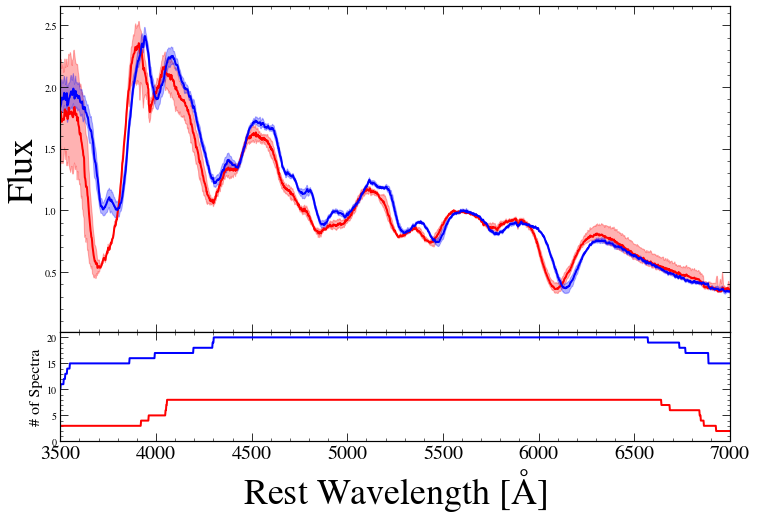

In [6]:
plotKaepora(f_kpora_hv,f_kpora_lv)

HV: 15
NV: 38
B-V HV: -0.140
B-V LV: -0.226


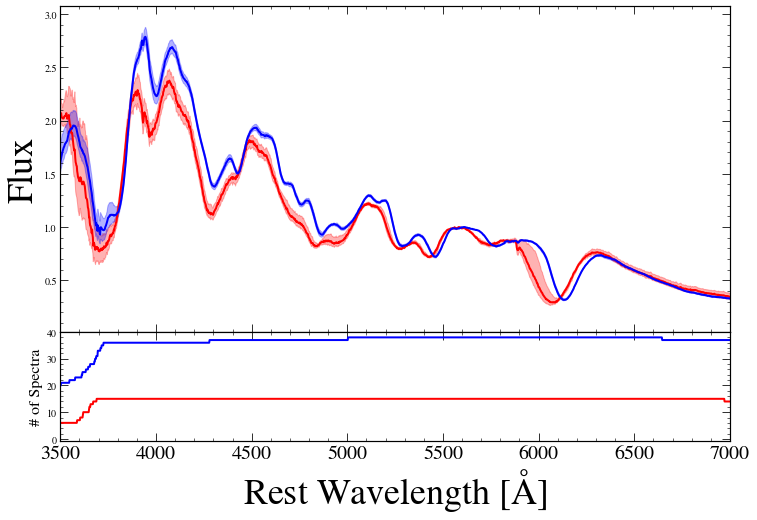

In [7]:
plotKaepora(k_kpora_hv,k_kpora_lv)

HV: 23
NV: 61
B-V HV: -0.112
B-V LV: -0.182


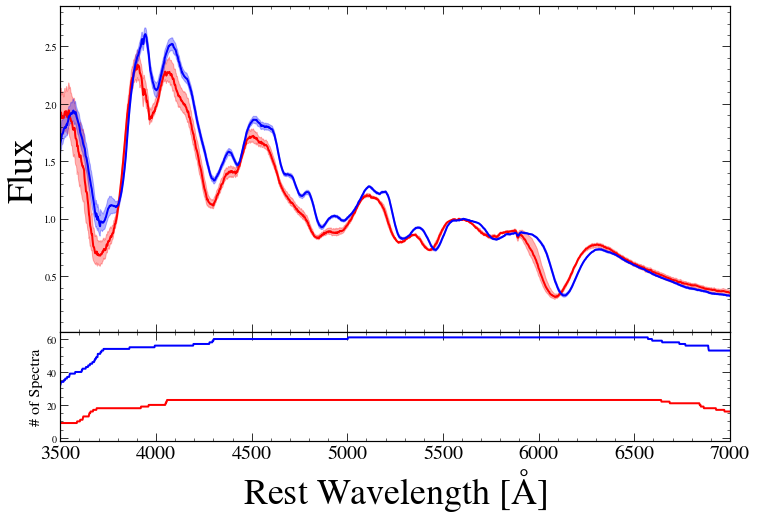

In [8]:
plotKaepora(b_kpora_hv,b_kpora_lv)
plt.savefig('compositeSpec_figures/kaepora+foundation_compositeSpec.pdf',bbox_inches='tight')
plt.savefig('compositeSpec_figures/kaepora+foundation_compositeSpec.png',bbox_inches='tight')